In [272]:
# Q-Learning
# Small number of states

import numpy as np
import time
import io
import matplotlib.pyplot as plt
from hiive.mdptoolbox import mdp, example

size = 5

P_s, R_s = example.forest(S = size, r1 = 4, r2=2)

In [273]:
time1 = time.perf_counter()

alpha = 0.2
gamma = 0.9
alpha_decay=0.9
alpha_min=0.01
epsilon=1.0
epsilon_min=0.2
epsilon_decay=0.9
n_iter = 1000000

QL_s = mdp.QLearning(P_s, R_s, alpha=alpha, gamma= gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter)
QL_s.run()

time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

time for running the algorithm = 60.21025205499609 s


Optimal value function :
[[17.06977537]
 [19.14623861]
 [21.64412504]
 [25.56100444]
 [29.20876467]]
Optimal policy :
[[0]
 [0]
 [0]
 [0]
 [0]]


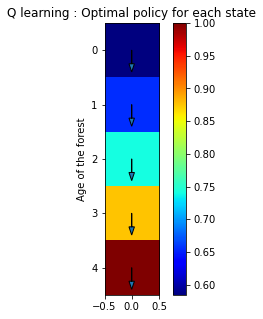

In [274]:
# Value function and policy visualization
size = 5
list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_s = list(QL_s.V)
list_Z_s = []
for i in range(len(value_s)):
    list_Z_s.append(value_s[i]/max(value_s))
    if list_Z_s[i]==0:
        list_Z_s[i]= -0.2
list_Z_s_norm = np.reshape(list_Z_s,(size,1))

print('Optimal value function :')
print(np.reshape(QL_s.V,(size,1)))

arrows = {1:(0,-1), 0:(0,1)}
scale = 0.25

ar_s =  np.reshape(QL_s.policy,(size,1))
print('Optimal policy :')
print(ar_s)

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Q learning : Optimal policy for each state')
ax.set_ylabel('Age of the forest')
pos = ax.imshow(list_Z_s_norm,interpolation='none',cmap=plt.cm.jet)
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_s_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

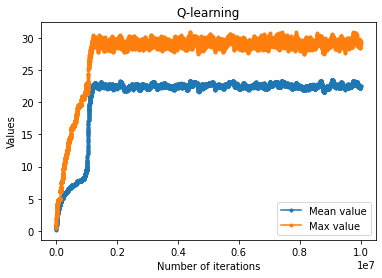

In [276]:
list_meanV_QL_s = []
list_maxV_QL_s = []
list_iteration_QL_s = []
for i in range(len(QL_s.run_stats)):
    list_meanV_QL_s.append(QL_s.run_stats[i].get('Mean V'))
    list_maxV_QL_s.append(QL_s.run_stats[i].get('Max V'))
    list_iteration_QL_s.append(QL_s.run_stats[i].get('Iteration')*10)

fig, ax = plt.subplots()
ax.set_title('Q-learning')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_QL_s, list_meanV_QL_s, marker ='.', label="Mean value")
ax.plot(list_iteration_QL_s, list_maxV_QL_s, marker=".", label="Max value")
ax.legend()
plt.show()

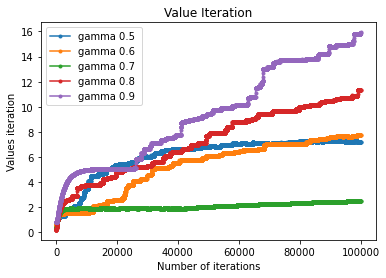

In [97]:
# Value function vs number of iteration with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_maxV_QL = [[]for i in range(n_gamma)]
list_iterations_QL=[[]for i in range(n_gamma)]

alpha = 0.2
alpha_decay=0.9
alpha_min=0.01
epsilon=1.0
epsilon_min=0.2
epsilon_decay=0.9
n_iter = 100000

for i in range(n_gamma):
    QL_s = mdp.QLearning(P_s, R_s, alpha=alpha, gamma=0.5+i*delta_gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter )
    QL_s.run()
    for j in range(len(QL_s.run_stats)):
        list_maxV_QL[i].append(QL_s.run_stats[j].get('Max V'))
        list_iterations_QL[i].append(QL_s.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values iteration')
for i in range(n_gamma):
    ax.plot(list_iterations_QL[i], list_maxV_QL[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

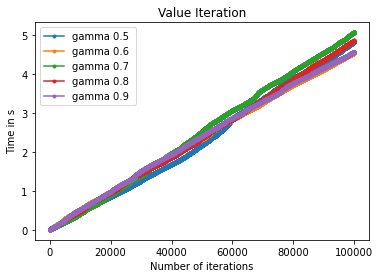

In [60]:
# Execution time vs number of iteration with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_iterations_QL=[[]for i in range(n_gamma)]
list_time_QL=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    QL_s = mdp.QLearning(P_s, R_s, alpha=alpha, gamma=0.5+i*delta_gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter )
    QL_s.run()
    for j in range(len(QL_s.run_stats)):
        list_iterations_QL[i].append(QL_s.run_stats[j].get('Iteration'))
        list_time_QL[i].append(QL_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_QL[i], list_time_QL[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

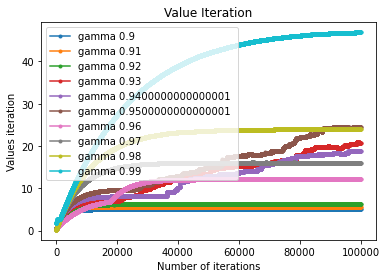

In [62]:
# Value function vs number of iteration with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_maxV_QL = [[]for i in range(n_gamma)]
list_iterations_QL=[[]for i in range(n_gamma)]

alpha = 0.2
alpha_decay=0.9
alpha_min=0.01
epsilon=1.0
epsilon_min=0.2
epsilon_decay=0.9
n_iter = 100000

for i in range(n_gamma):
    QL_s = mdp.QLearning(P_s, R_s, alpha=alpha, gamma=0.9+i*delta_gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter )
    QL_s.run()
    for j in range(len(QL_s.run_stats)):
        list_maxV_QL[i].append(QL_s.run_stats[j].get('Max V'))
        list_iterations_QL[i].append(QL_s.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values iteration')
for i in range(n_gamma):
    ax.plot(list_iterations_QL[i], list_maxV_QL[i], marker=".", label='gamma {} '.format(0.9+i*delta_gamma))
ax.legend()
plt.show()

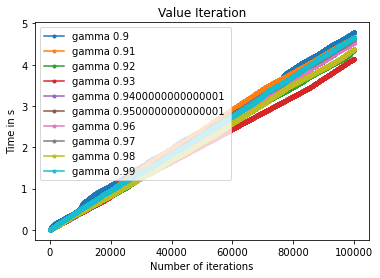

In [63]:
# Execution time vs number of iteration with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_iterations_QL=[[]for i in range(n_gamma)]
list_time_QL=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    QL_s = mdp.QLearning(P_s, R_s, alpha=alpha, gamma=0.9+i*delta_gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter )
    QL_s.run()
    for j in range(len(QL_s.run_stats)):
        list_iterations_QL[i].append(QL_s.run_stats[j].get('Iteration'))
        list_time_QL[i].append(QL_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_QL[i], list_time_QL[i], marker=".", label='gamma {} '.format(0.9+i*delta_gamma))
ax.legend()
plt.show()

In [47]:
##################
##################
##################
##################
##################

In [233]:
# large number of states

size = 20
P_l, R_l = example.forest(S = size,r1=4,r2=2)

In [306]:
time1 = time.perf_counter()

alpha = 0.5
gamma = 0.995
alpha_decay=0.99
alpha_min=0.01
epsilon=1.0
epsilon_min=0.003
epsilon_decay=0.95
n_iter = 3000000

QL_l = mdp.QLearning(P_l, R_l, alpha=alpha, gamma= gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter)
QL_l.run()

time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

time for running the algorithm = 128.1254741580051 s


Optimal value function :
[[ 94.6233816 ]
 [ 95.16655974]
 [ 94.55695912]
 [ 95.14633289]
 [ 94.04999826]
 [ 94.56060231]
 [ 95.14995196]
 [100.04133018]
 [101.41209512]
 [102.27249448]
 [103.54475091]
 [105.36518193]
 [107.34464789]
 [109.43445863]
 [111.98397398]
 [115.1860737 ]
 [118.37768085]
 [120.94038732]
 [123.86090395]
 [127.61376977]]
Optimal policy :
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


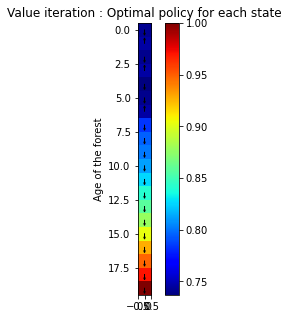

In [307]:
# Value function and policy visualization
size = 20

list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_l = list(QL_l.V)
list_Z_l = []
for i in range(len(value_l)):
    list_Z_l.append(value_l[i]/max(value_l))
    if list_Z_l[i]==0:
        list_Z_l[i]= -0.2
list_Z_l_norm = np.reshape(list_Z_l,(size,1))

print('Optimal value function :')
print(np.reshape(QL_l.V,(size,1)))

arrows = {1:(0,-1), 0:(0,1)}
scale = 0.25

ar_s =  np.reshape(QL_l.policy,(size,1))
print('Optimal policy :')
print(ar_s)

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_ylabel('Age of the forest')
pos = ax.imshow(list_Z_l_norm,interpolation='none',cmap=plt.cm.jet)
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_l_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

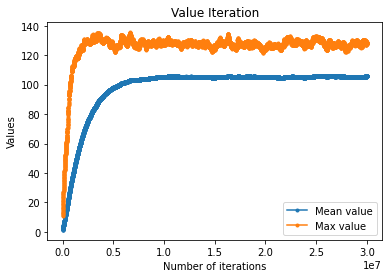

In [308]:
# Convergence plot : Max value vs Iteration

list_meanV_QL_l = []
list_maxV_QL_l = []
list_iteration_QL_l = []
for i in range(len(QL_l.run_stats)):
    list_meanV_QL_l.append(QL_l.run_stats[i].get('Mean V'))
    list_maxV_QL_l.append(QL_l.run_stats[i].get('Max V'))
    list_iteration_QL_l.append(QL_l.run_stats[i].get('Iteration')*10)

fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_QL_l, list_meanV_QL_l, marker ='.', label="Mean value")
ax.plot(list_iteration_QL_l, list_maxV_QL_l, marker=".", label="Max value")
ax.legend()
plt.show()

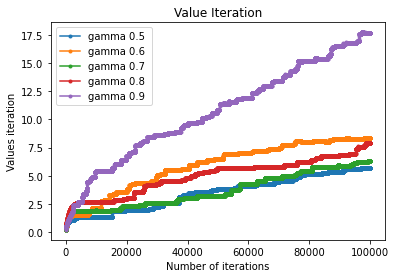

In [271]:
# Value function vs number of iteration with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_maxV_QL = [[]for i in range(n_gamma)]
list_iterations_QL=[[]for i in range(n_gamma)]

alpha = 0.2
alpha_decay=0.9
alpha_min=0.01
epsilon=1.0
epsilon_min=0.2
epsilon_decay=0.9
n_iter = 100000

for i in range(n_gamma):
    QL_l = mdp.QLearning(P_l, R_l, alpha=alpha, gamma=0.5+i*delta_gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter )
    QL_l.run()
    for j in range(len(QL_l.run_stats)):
        list_maxV_QL[i].append(QL_l.run_stats[j].get('Max V'))
        list_iterations_QL[i].append(QL_l.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values iteration')
for i in range(n_gamma):
    ax.plot(list_iterations_QL[i], list_maxV_QL[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()# Value function vs number of iteration with gamma = 0.5 to 0.9

In [ ]:
# Execution time vs number of iteration with gamma = 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_iterations_QL=[[]for i in range(n_gamma)]
list_time_QL=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    QL_l = mdp.QLearning(P_s, R_s, alpha=alpha, gamma=0.5+i*delta_gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter )
    QL_l.run()
    for j in range(len(QL_l.run_stats)):
        list_iterations_QL[i].append(QL_l.run_stats[j].get('Iteration'))
        list_time_QL[i].append(QL_l.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_QL[i], list_time_QL[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

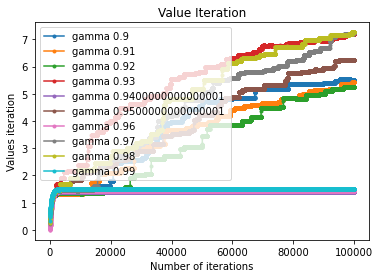

In [71]:
# Value function vs number of iteration with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_maxV_QL = [[]for i in range(n_gamma)]
list_iterations_QL=[[]for i in range(n_gamma)]

alpha = 0.2
alpha_decay=0.9
alpha_min=0.01
epsilon=1.0
epsilon_min=0.2
epsilon_decay=0.9
n_iter = 100000

for i in range(n_gamma):
    QL_l = mdp.QLearning(P_l, R_l, alpha=alpha, gamma=0.5+i*delta_gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter )
    QL_l.run()
    for j in range(len(QL_l.run_stats)):
        list_maxV_QL[i].append(QL_l.run_stats[j].get('Max V'))
        list_iterations_QL[i].append(QL_l.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values iteration')
for i in range(n_gamma):
    ax.plot(list_iterations_QL[i], list_maxV_QL[i], marker=".", label='gamma {} '.format(0.9+i*delta_gamma))
ax.legend()
plt.show()# Value function vs number of iteration with gamma = 0.5 to 0.9

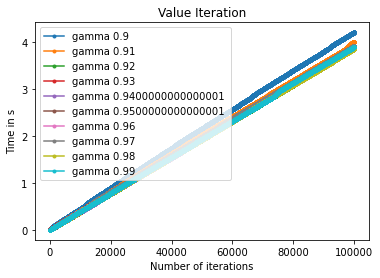

In [72]:
# Execution time vs number of iteration with gamma = 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_iterations_QL=[[]for i in range(n_gamma)]
list_time_QL=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    QL_l = mdp.QLearning(P_s, R_s, alpha=alpha, gamma=0.5+i*delta_gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter )
    QL_l.run()
    for j in range(len(QL_l.run_stats)):
        list_iterations_QL[i].append(QL_l.run_stats[j].get('Iteration'))
        list_time_QL[i].append(QL_l.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_QL[i], list_time_QL[i], marker=".", label='gamma {} '.format(0.9+i*delta_gamma))
ax.legend()
plt.show()